In [18]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

In [19]:
data = pd.read_csv("D:\\final year project\\mbti_1.csv")
data.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [21]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [22]:
_classes = data.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [23]:
def show_class_distribution(data, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

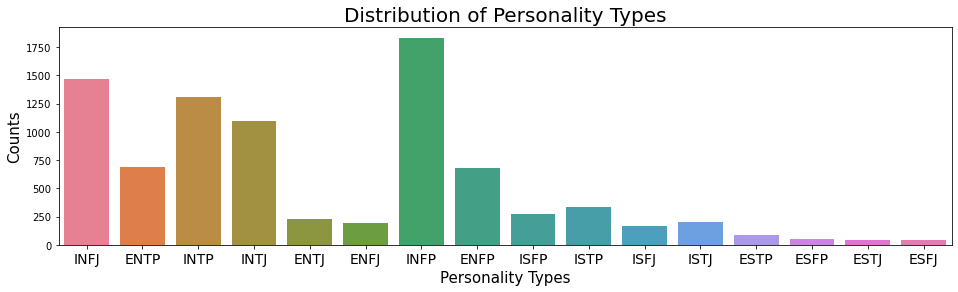

In [24]:
show_class_distribution(data, xticks_size=14)

In [26]:
def divide_types(df):
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    for index, row in df.iterrows():
        row["E-I"] = "E" if row.type[0] == "E" else "I"
        row["N-S"] = "N" if row.type[1] == "N" else "S"
        row["F-T"] = "F" if row.type[2] == "F" else "T"
        row["J-P"] = "J" if row.type[3] == "J" else "P"
    return df

data = divide_types(data)


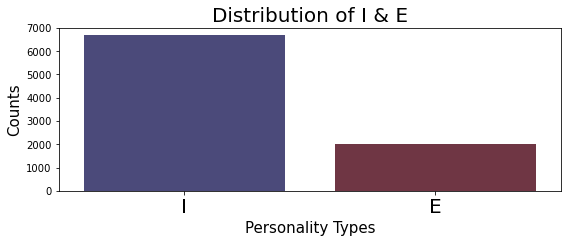

In [27]:
show_class_distribution(data, x="E-I", title="Distribution of I & E", figsize=(9,3), xticks_size=20, palette="icefire")

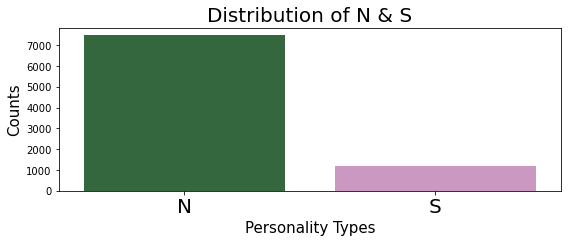

In [28]:
show_class_distribution(data, x="N-S", title="Distribution of N & S", figsize=(9,3), xticks_size=20, palette="cubehelix")

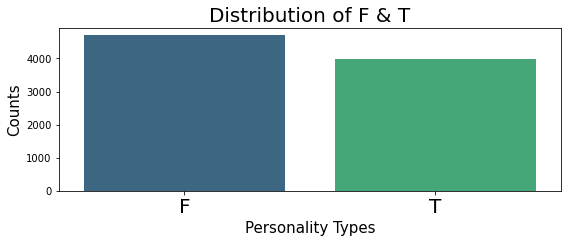

In [29]:
show_class_distribution(data, x="F-T", title="Distribution of F & T", figsize=(9,3), xticks_size=20, palette="viridis")


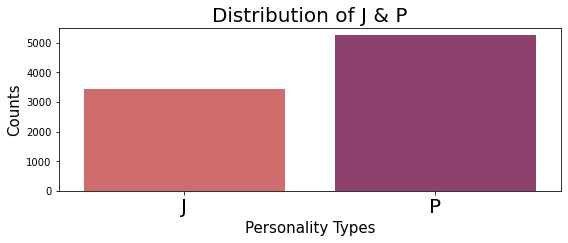

In [30]:
show_class_distribution(data, x="J-P", title="Distribution of J & P", figsize=(9,3), xticks_size=20, palette="flare")


In [31]:
data.loc[5, "posts"]


"'18/37 @.@|||Science  is not perfect. No scientist claims that it is, or that scientific  information will not be revised as we discover new things.  Rational  thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi and are quick to put her as INFP. I agree that she has no Ne. I see her as an ISFP. Compare her to Haku (definite INFP). She is flat through most of Naruto.. but I don't...|||Lets get this party started  66314|||I did not say it disproved God. I merely said that I found such methods disturbing. Although, it does bring up certain questions. God is in control of the universe, and the governments of the world,...|||Surprisingly, I could not find a thread about this on perc even with Google. So, here you go.  Watch Jesus Camp online - Watch Movies Online, Full Movies, Download  I was disturbed watching this...|||A metaphysical gun (Hell) held to someone's head can be just as effective as an actual

In [32]:
def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

data = fix_contractions(data)


In [33]:
def clean_data(df, column_name = "cleaned_post"):
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: " ".join([word for word in x.split() if not len(word) <3]))
    return df

data = clean_data(data)

In [35]:
data.loc[5,"cleaned_post"]


'science not perfect scientist claims that that scientific information will not revised discover new things rational thinking has been very useful our society infp edgar allen poe was infp and your siggy people see the obvious and are quick put her infp agree that she has see her isfp compare her haku definite infp she flat through most naruto but not let get this party started did not say disproved god merely said that found such methods disturbing although does bring certain questions god control the universe and the governments the world surprisingly could not find thread about this perc even with google here you watch jesus camp online watch movies online full movies download was disturbed watching this metaphysical gun hell held someone head can just effective actual gun you not find these methods disturbing watch jesus camp online watch movies online full movies unstable not the right word are usually pretty emotionally flat lined but when have deal with our own emotions can very

In [36]:
data["words_count"] = data["cleaned_post"].apply(lambda x: len(x.split()))
data.head(5)

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782


In [37]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)


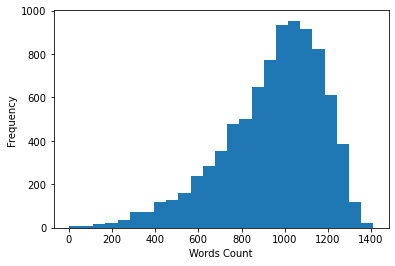

In [38]:
plot_counts(data, column="words_count", xlabel="Words Count")


In [39]:
data["char_count"] = data["cleaned_post"].apply(lambda x: len(x))
data.head(5)


,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692


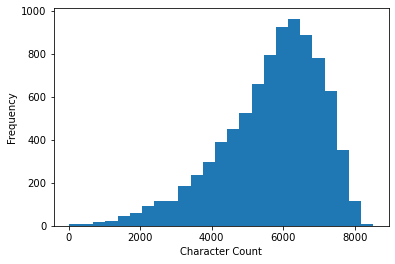

In [41]:
plot_counts(data, column="char_count", xlabel="Character Count")


In [42]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
stopword_list = stopwords.words("english")

In [43]:
def get_most_frequent(data, stop_words, column="cleaned_post", top=25):
    df = data[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [44]:
most_frequents = get_most_frequent(data, stopword_list)
most_frequents[:10]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337)]

# Word Clouds 

In [45]:
def show_wordcloud(data, stopword_list, column="cleaned_post"):
    fig = plt.figure(figsize=(15,5))
    wordcloud = WordCloud(background_color="white", min_font_size=5, stopwords=stopword_list).generate(data[column].to_string())
    plt.axis("on")
    plt.imshow(wordcloud)
    plt.show()

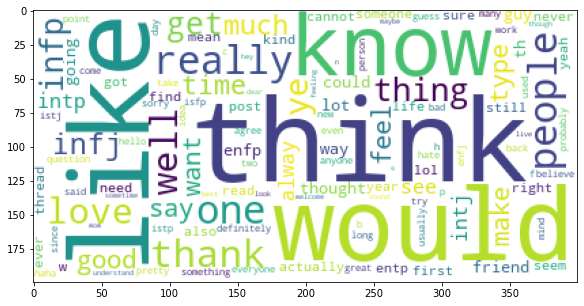

In [47]:
show_wordcloud(data, stopword_list)


In [48]:
def show_sub_wordclouds(data, type_column, column, size, fig_size=(20,15)):
    classes = data[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    j = 0
    for _class in classes:
        temp = data[data[type_column] == _class]
        wordcloud = WordCloud(background_color="white").generate(temp[column].to_string())
        plt.subplot(*size, j+1)
        plt.title(_class, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        j+=1


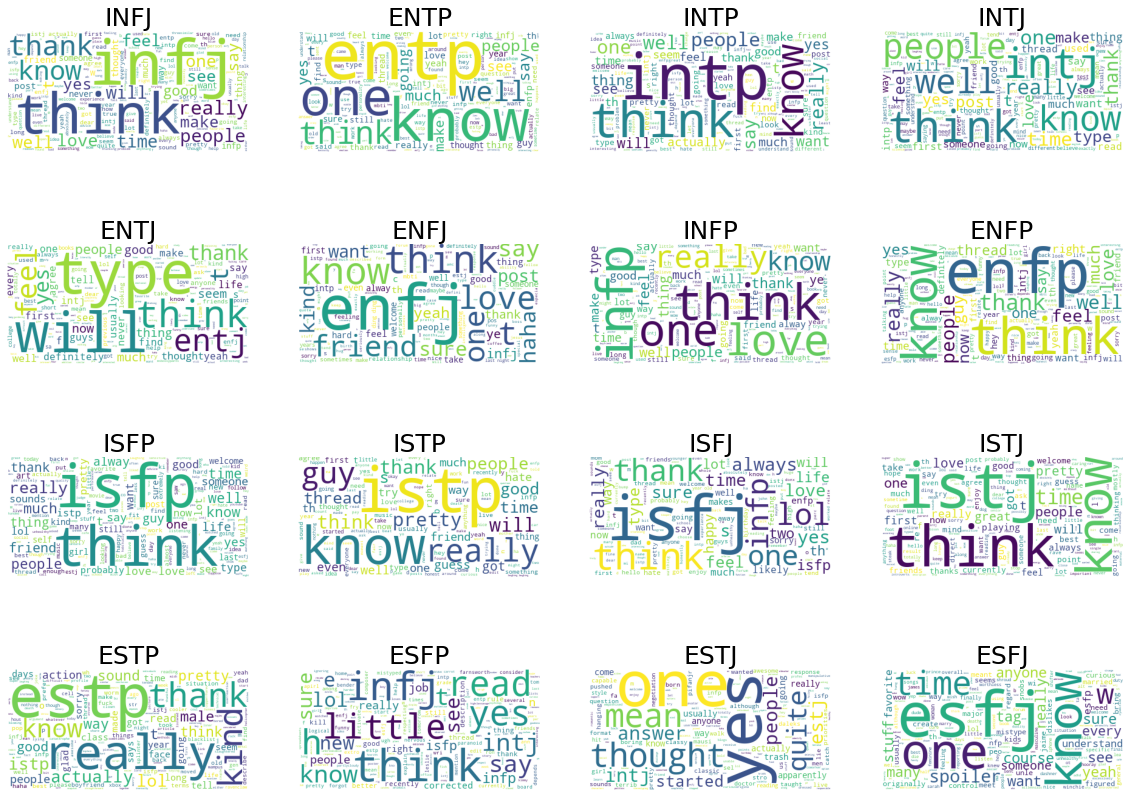

In [50]:
show_sub_wordclouds(data, type_column="type" , column="cleaned_post", size=(4,4))


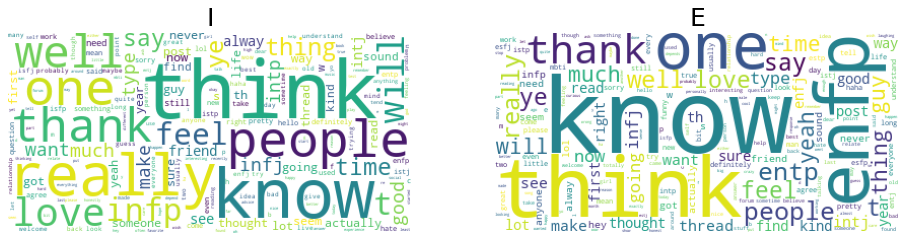

In [51]:
show_sub_wordclouds(data, type_column="E-I" , column="cleaned_post", size=(1,2), fig_size=(16,8))


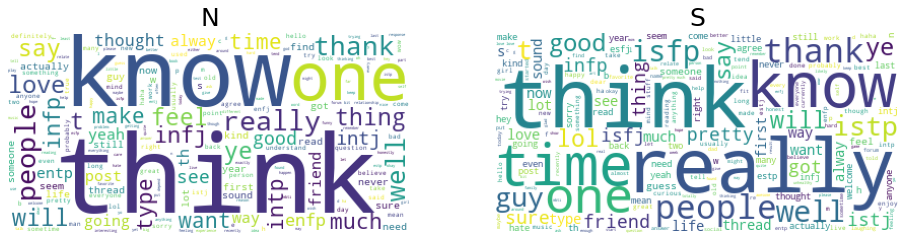

In [52]:
show_sub_wordclouds(data, type_column="N-S" , column="cleaned_post", size=(1,2), fig_size=(16,8))


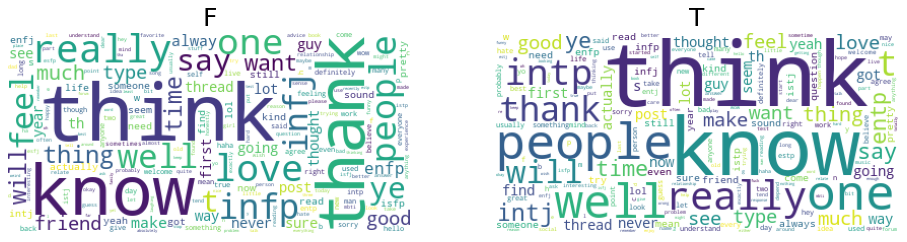

In [53]:
show_sub_wordclouds(data, type_column="F-T" , column="cleaned_post", size=(1,2), fig_size=(16,8))


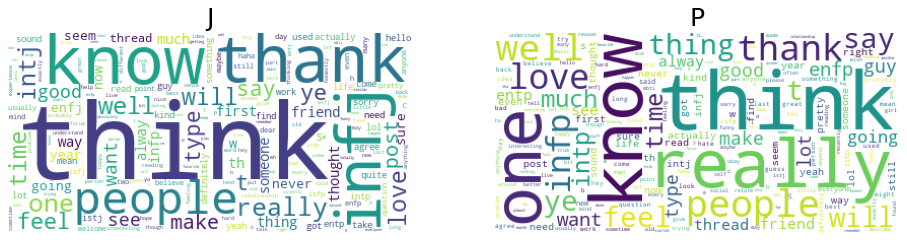

In [54]:
show_sub_wordclouds(data, type_column="J-P" , column="cleaned_post", size=(1,2), fig_size=(16,8))


# N-gram

In [55]:
def get_ngrams(data, n_gram, new_column, column="cleaned_post"):
    data["tokenized"]  = data[column].apply(lambda x: x.split())
    data["sw_removal"] = data["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    data[new_column]   = data["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    data.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return data

In [56]:
data = get_ngrams(data, n_gram=2, new_column="bigrams")
data.head(5)

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764,"[(intj, moments), (moments, sportscenter), (sp..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000,"[(good, one), (one, course), (course, say), (s..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692,"[(fired, another), (another, silly), (silly, m..."


In [58]:
data = get_ngrams(data, n_gram=2, new_column="trigrams")
data.head(5)

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams,trigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764,"[(intj, moments), (moments, sportscenter), (sp...","[(intj, moments), (moments, sportscenter), (sp..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm...","[(finding, lack), (lack, posts), (posts, alarm..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000,"[(good, one), (one, course), (course, say), (s...","[(good, one), (one, course), (course, say), (s..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv...","[(dear, intp), (intp, enjoyed), (enjoyed, conv..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692,"[(fired, another), (another, silly), (silly, m...","[(fired, another), (another, silly), (silly, m..."


In [59]:
training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
training_data.head(5)

,cleaned_post,E-I,N-S,F-T,J-P
0,and intj moments sportscenter not top ten play...,I,N,F,J
1,finding the lack these posts very alarming sex...,E,N,T,P
2,good one course which say know that blessing a...,I,N,T,P
3,dear intp enjoyed our conversation the other d...,I,N,T,J
4,you are fired that another silly misconception...,E,N,T,J


In [60]:
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data

In [61]:
training_data = make_dummies(training_data)
training_data.head()

,cleaned_post,E-I,N-S,F-T,J-P,type_E,type_I,type_N,type_S,type_F,type_T,type_J,type_P
0,and intj moments sportscenter not top ten play...,I,N,F,J,0,1,1,0,1,0,1,0
1,finding the lack these posts very alarming sex...,E,N,T,P,1,0,1,0,0,1,0,1
2,good one course which say know that blessing a...,I,N,T,P,0,1,1,0,0,1,0,1
3,dear intp enjoyed our conversation the other d...,I,N,T,J,0,1,1,0,0,1,1,0
4,you are fired that another silly misconception...,E,N,T,J,1,0,1,0,0,1,1,0


# Handling Imbalanced Data

In [62]:
X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

In [63]:
def show_distribution(data, x=["E-I", "N-S", "F-T","J-P"], fig_size=(15,7), xticks_size=10, palette="icefire"):
    fig, ax = plt.subplots(len(x), figsize=fig_size)
    j = 0
    for _x in x:
        plt.subplot(1,4, j+1)
        sns.countplot(x=_x, data=data, palette=palette)
        plt.xticks(size=xticks_size)
        j+=1

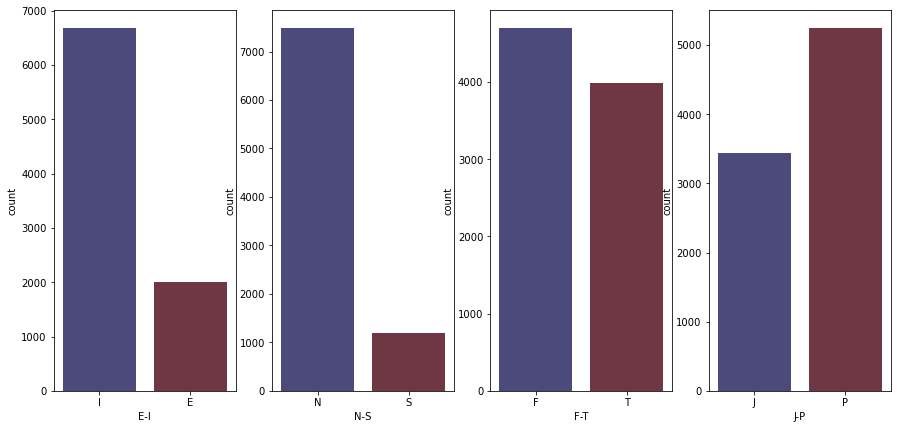

In [64]:
show_distribution(data)

In [60]:
!pip install imblearn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [65]:
from imblearn.over_sampling import RandomOverSampler

In [66]:
oversample = RandomOverSampler()

y_ei = y["type_E"]
y_ns = y["type_N"]
y_ft = y["type_F"]
y_jp = y["type_J"]

X_over_ei, y_over_ei = oversample.fit_resample(X, y_ei)
X_over_ns, y_over_ns = oversample.fit_resample(X, y_ns)
X_over_ft, y_over_ft = oversample.fit_resample(X, y_ft)
X_over_jp, y_over_jp = oversample.fit_resample(X, y_jp)

In [67]:
def showdiagram():

    show_class_distribution(data=X_over_ei, x=y_over_ei, figsize=(7,3), title="E-I")

    show_class_distribution(data=X_over_ns, x=y_over_ns, figsize=(7,3), title="N-S")

    show_class_distribution(data=X_over_ft, x=y_over_ft, figsize=(7,3), title="F-T")

    show_class_distribution(data=X_over_jp, x=y_over_jp, figsize=(7,3), title="J-P")

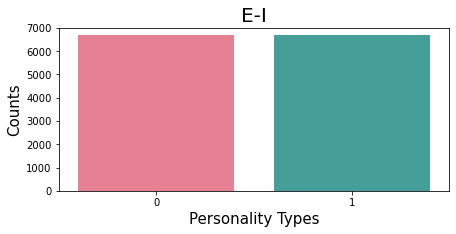

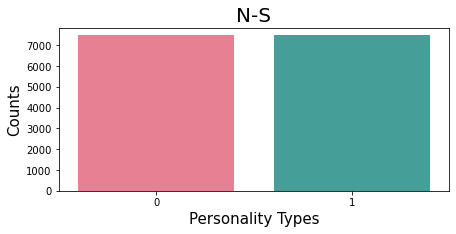

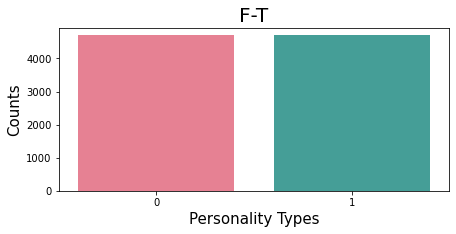

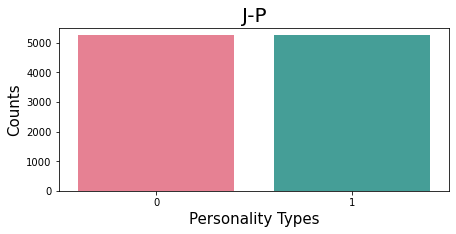

In [68]:
showdiagram()

# Train_Test_Split

In [69]:
from sklearn.model_selection import train_test_split

In [94]:
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(X_over_ei, y_over_ei, test_size=0.3, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_over_ns, y_over_ns, test_size=0.3, random_state=42)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_over_ft, y_over_ft, test_size=0.3, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_over_jp, y_over_jp, test_size=0.3, random_state=42)

In [95]:
X_train_ei = X_train_ei['cleaned_post']
X_train_ns = X_train_ns['cleaned_post']
X_train_ft = X_train_ft['cleaned_post']
X_train_jp = X_train_jp['cleaned_post']

In [98]:
X_test_ei = X_test_ei['cleaned_post']
X_test_ns = X_test_ns['cleaned_post']
X_test_ft = X_test_ft['cleaned_post']
X_test_jp = X_test_jp['cleaned_post']

KeyError: 'cleaned_post'

In [99]:
y_train_ei.name, y_test_ei.name = "E-I", "E-I"
y_train_ns.name, y_test_ns.name = "N-S", "N-S"
y_train_ft.name, y_test_ft.name = "F-T", "F-T"
y_train_jp.name, y_test_jp.name = "J-P", "J-P"

In [100]:
y_all_train = [y_train_ei, y_train_ns, y_train_ft,  y_train_jp]
y_all_test  = [y_test_ei, y_test_ns, y_test_ft, y_test_jp]

# TF-IDF Vectorizer

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
vectorizer = TfidfVectorizer(max_features=10000)
vectorizer.fit(X_train_ei)

TfidfVectorizer(max_features=10000)

In [103]:
X_train_ei = vectorizer.transform(X_train_ei)
X_test_ei  = vectorizer.transform(X_test_ei)

X_train_ns = vectorizer.transform(X_train_ns)
X_test_ns  = vectorizer.transform(X_test_ns)

X_train_ft = vectorizer.transform(X_train_ft)
X_test_ft  = vectorizer.transform(X_test_ft)

X_train_jp = vectorizer.transform(X_train_jp)
X_test_jp  = vectorizer.transform(X_test_jp)

In [104]:
x_all_train = [X_train_ei, X_train_ns, X_train_ft, X_train_jp]
x_all_test  = [X_test_ei, X_test_ns, X_test_ft, X_test_jp]
tf_idf = pd.DataFrame(X_test_ei.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head(10)

,aaaand,aback,abandon,abandoned,abhor,abilities,ability,able,abnormal,aboard,...,zero,zodiac,zoe,zombie,zombies,zone,zoned,zoning,zoo,zooey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.083205,0.0,0.0,0.0,0.03171,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025287,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.023365,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


# Model

In [85]:
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pickle
from sklearn import metrics

In [86]:
def create_models():
    logr = linear_model.LogisticRegression()
    nb_clf  = MultinomialNB(alpha=0.01)
    svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    dt_clf  = DecisionTreeClassifier(max_depth=7)
    rf_clf  = RandomForestClassifier(n_estimators=750)
    xgb_clf = xgboost.XGBClassifier(use_label_encoder=False)
    return {"NaiveBayes":nb_clf, "SVM":svm_clf, "DecisionTree":dt_clf, "RandomForest":rf_clf, "Xgboost":xgb_clf}

# Model Selection and creation 

In [87]:
_metrics = ["Accuracy", "Accuracy", "Accuracy" ,"Accuracy", "Precision", "Precision", "Precision","Precision", "Recall","Recall","Recall","Recall", "F1-Score", "F1-Score", "F1-Score", "F1-Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score"]
_types   = ["E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P"]
_columns = ["NaiveBayes", "SVM", "DecisionTree", "RandomForest", "Xgboost","Logistic_Regression"]

In [88]:
evaluation_df = pd.DataFrame(columns=_columns, index=[_metrics, _types])
evaluation_df

NaiveBayes  SVM DecisionTree RandomForest Xgboost  \
Accuracy      E-I        NaN  NaN          NaN          NaN     NaN   
              N-S        NaN  NaN          NaN          NaN     NaN   
              F-T        NaN  NaN          NaN          NaN     NaN   
              J-P        NaN  NaN          NaN          NaN     NaN   
Precision     E-I        NaN  NaN          NaN          NaN     NaN   
              N-S        NaN  NaN          NaN          NaN     NaN   
              F-T        NaN  NaN          NaN          NaN     NaN   
              J-P        NaN  NaN          NaN          NaN     NaN   
Recall        E-I        NaN  NaN          NaN          NaN     NaN   
              N-S        NaN  NaN          NaN          NaN     NaN   
              F-T        NaN  NaN          NaN          NaN     NaN   
              J-P        NaN  NaN          NaN          NaN     NaN   
F1-Score      E-I        NaN  NaN          NaN          NaN     NaN   
              N-S        NaN  NaN          NaN          NaN     NaN   
              F-T        NaN  NaN          NaN          NaN     NaN   
              J-P        NaN  NaN          NaN          NaN     NaN   
Roc-Auc Score E-I        NaN  NaN          NaN          NaN     NaN   
              N-S        NaN  NaN          NaN          NaN     NaN   
              F-T        NaN  NaN          NaN          NaN     NaN   
              J-P        NaN  NaN          NaN          NaN     NaN   

                  Logistic_Regression  
Accuracy      E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
Precision     E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
Recall        E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
F1-Score      E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
Roc-Auc Score E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN

In [89]:
models = create_models()
models

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'NaiveBayes': MultinomialNB(alpha=0.01),
 'SVM': SVC(gamma='auto', kernel='linear'),
 'DecisionTree': DecisionTreeClassifier(max_depth=7),
 'RandomForest': RandomForestClassifier(n_estimators=750),
 'Xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}

In [109]:
for model_item in models.items():
    for X_train, X_test, y_train, y_test in zip(x_all_train, x_all_test, y_all_train, y_all_test):
        # Model creation and prediction
        model = model_item[1]
        print(f"{model} is training for {y_train.name}...")
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        # Performance evaluation metrics
        evaluation_df.loc["Accuracy",y_train.name][model_item[0]]      = round(metrics.accuracy_score(y_test, pred), 3)
        evaluation_df.loc["Precision",y_train.name][model_item[0]]     = round(metrics.precision_score(y_test, pred), 3)
        evaluation_df.loc["Recall",y_train.name][model_item[0]]        = round(metrics.recall_score(y_test, pred), 3)        
        evaluation_df.loc["F1-Score",y_train.name][model_item[0]]      = round(metrics.f1_score(y_test, pred), 3)
        evaluation_df.loc["Roc-Auc Score",y_train.name][model_item[0]] = round(metrics.roc_auc_score(y_test, pred), 3)        

MultinomialNB(alpha=0.01) is training for E-I...
MultinomialNB(alpha=0.01) is training for N-S...
MultinomialNB(alpha=0.01) is training for F-T...
MultinomialNB(alpha=0.01) is training for J-P...
SVC(gamma='auto', kernel='linear') is training for E-I...
SVC(gamma='auto', kernel='linear') is training for N-S...
SVC(gamma='auto', kernel='linear') is training for F-T...
SVC(gamma='auto', kernel='linear') is training for J-P...
DecisionTreeClassifier(max_depth=7) is training for E-I...
DecisionTreeClassifier(max_depth=7) is training for N-S...
DecisionTreeClassifier(max_depth=7) is training for F-T...
DecisionTreeClassifier(max_depth=7) is training for J-P...
RandomForestClassifier(n_estimators=750) is training for E-I...
RandomForestClassifier(n_estimators=750) is training for N-S...
RandomForestClassifier(n_estimators=750) is training for F-T...
RandomForestClassifier(n_estimators=750) is training for J-P...
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsa

In [110]:



evaluation_df

NaiveBayes    SVM DecisionTree RandomForest Xgboost  \
Accuracy      E-I       0.82  0.888        0.791        0.948   0.937   
              N-S      0.901  0.946        0.807        0.992   0.971   
              F-T      0.803  0.854        0.769        0.839   0.843   
              J-P      0.726  0.809        0.724        0.817   0.845   
Precision     E-I      0.821  0.884        0.839        0.988   0.915   
              N-S      0.906  0.968        0.786        0.988   0.994   
              F-T      0.796  0.849         0.77        0.827   0.845   
              J-P      0.719  0.806        0.689        0.896   0.841   
Recall        E-I      0.818  0.894        0.722        0.908   0.963   
              N-S      0.898  0.923        0.849        0.996   0.947   
              F-T      0.816  0.861        0.765        0.856   0.841   
              J-P      0.735  0.812        0.811        0.714   0.848   
F1-Score      E-I       0.82  0.889        0.776        0.946   0.938   
              N-S      0.902  0.945        0.816        0.992    0.97   
              F-T      0.806  0.855        0.767        0.841   0.843   
              J-P      0.727  0.809        0.745        0.795   0.845   
Roc-Auc Score E-I       0.82  0.888        0.791        0.948   0.936   
              N-S      0.901  0.946        0.807        0.992   0.971   
              F-T      0.803  0.854        0.769        0.839   0.843   
              J-P      0.726  0.809        0.724        0.816   0.845   

                  Logistic_Regression  
Accuracy      E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
Precision     E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
Recall        E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
F1-Score      E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN  
Roc-Auc Score E-I                 NaN  
              N-S                 NaN  
              F-T                 NaN  
              J-P                 NaN